In [ ]:
import pandas as pd
import numpy as np
import spotipy
import wbpy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cid = '011724aec4a9410ab990db1b750ec743'
secret = '0dfacc516a4f4e44952635f794a94964'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

eu =['ES',
 'FI',
 'IE',
 'GR',
 'DE',
 'DK',
 'AT',
 'SE',
 'PL',
 'LT',
 'IT',
 'LU',
 'NL',
 'EE',
 'CZ',
 'GB',
 'HU',
 'SK',
 'BE',
 'FR',
 'PT',
 'LV']

In [3]:
df = pd.read_csv("/Users/cetiners/Desktop/data.csv")

In [4]:
df_filtered = df.loc[df.Position < 26]

In [5]:
df_filtered["track_id"] = df_filtered["URL"].str.split("/",expand=True)[4]

<ipython-input-5-722c8cbd27c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["track_id"] = df_filtered["URL"].str.split("/",expand=True)[4]


In [6]:
track_ids = df_filtered["track_id"].unique()

In [7]:
track_ids

array(['3AEZUABDXNtecAOSC1qTfo', '6mICuAdrwEjh6Y6lroV2Kg',
       '3QwBODjSEzelZyVjxPOHdq', ..., '1eId3TVzGrwv73YAWAVQMX',
       '57kbuHAxIrN3CCysKVMG93', '0e3nb2Nttd12LNBhweuNms'], dtype=object)

In [8]:
dic = {}
for id in track_ids:
    dic[str(id)] =  sp.audio_features(str(id))

In [9]:
df2 = pd.DataFrame(dic).T.dropna()

In [10]:
df2 = pd.json_normalize(df2[0])

In [11]:
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.761,0.838,4,-3.073,0,0.0502,0.40000,0.000000,0.176,0.710,93.974,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560,4
1,0.852,0.773,8,-2.921,0,0.0776,0.18700,0.000030,0.159,0.907,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840,4
2,0.832,0.772,10,-5.429,1,0.1000,0.05590,0.000486,0.440,0.704,96.016,audio_features,3QwBODjSEzelZyVjxPOHdq,spotify:track:3QwBODjSEzelZyVjxPOHdq,https://api.spotify.com/v1/tracks/3QwBODjSEzel...,https://api.spotify.com/v1/audio-analysis/3QwB...,209453,4
3,0.663,0.920,11,-4.070,0,0.2260,0.00431,0.000017,0.101,0.533,99.935,audio_features,7DM4BPaS7uofFul3ywMe46,spotify:track:7DM4BPaS7uofFul3ywMe46,https://api.spotify.com/v1/tracks/7DM4BPaS7uof...,https://api.spotify.com/v1/audio-analysis/7DM4...,259196,4
4,0.508,0.687,0,-4.361,1,0.3260,0.55100,0.000003,0.126,0.555,180.044,audio_features,6rQSrBHf7HlZjtcMZ4S4bO,spotify:track:6rQSrBHf7HlZjtcMZ4S4bO,https://api.spotify.com/v1/tracks/6rQSrBHf7HlZ...,https://api.spotify.com/v1/audio-analysis/6rQS...,205600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0.528,0.416,10,-8.492,1,0.0325,0.75600,0.000000,0.114,0.347,139.821,audio_features,53HxUdYRCRMdzYPG0qhGUP,spotify:track:53HxUdYRCRMdzYPG0qhGUP,https://api.spotify.com/v1/tracks/53HxUdYRCRMd...,https://api.spotify.com/v1/audio-analysis/53Hx...,267531,4
2925,0.654,0.673,5,-8.035,1,0.0300,0.18900,0.000179,0.152,0.648,89.998,audio_features,7tqVnkKyVnkqlvkm4cBBdb,spotify:track:7tqVnkKyVnkqlvkm4cBBdb,https://api.spotify.com/v1/tracks/7tqVnkKyVnkq...,https://api.spotify.com/v1/audio-analysis/7tqV...,206064,4
2926,0.650,0.425,9,-7.816,1,0.0266,0.83400,0.000000,0.120,0.403,75.988,audio_features,1eId3TVzGrwv73YAWAVQMX,spotify:track:1eId3TVzGrwv73YAWAVQMX,https://api.spotify.com/v1/tracks/1eId3TVzGrwv...,https://api.spotify.com/v1/audio-analysis/1eId...,237733,4
2927,0.668,0.604,7,-9.755,0,0.0300,0.18700,0.000137,0.255,0.652,90.002,audio_features,57kbuHAxIrN3CCysKVMG93,spotify:track:57kbuHAxIrN3CCysKVMG93,https://api.spotify.com/v1/tracks/57kbuHAxIrN3...,https://api.spotify.com/v1/audio-analysis/57kb...,209787,4


In [12]:
df_merged = pd.merge(df_filtered, 
                     df2, 
                     left_on ='track_id',
                     right_on = "id",
                     how ='left')

In [13]:
df_merged

,Position,Track Name,Artist,Streams,URL,Date,Region,track_id,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,0.1760,0.7100,93.974,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560.0,4.0
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,6mICuAdrwEjh6Y6lroV2Kg,0.852,0.773,...,0.1590,0.9070,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840.0,4.0
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,3QwBODjSEzelZyVjxPOHdq,0.832,0.772,...,0.4400,0.7040,96.016,audio_features,3QwBODjSEzelZyVjxPOHdq,spotify:track:3QwBODjSEzelZyVjxPOHdq,https://api.spotify.com/v1/tracks/3QwBODjSEzel...,https://api.spotify.com/v1/audio-analysis/3QwB...,209453.0,4.0
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,7DM4BPaS7uofFul3ywMe46,0.663,0.920,...,0.1010,0.5330,99.935,audio_features,7DM4BPaS7uofFul3ywMe46,spotify:track:7DM4BPaS7uofFul3ywMe46,https://api.spotify.com/v1/tracks/7DM4BPaS7uof...,https://api.spotify.com/v1/audio-analysis/7DM4...,259196.0,4.0
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,6rQSrBHf7HlZjtcMZ4S4bO,0.508,0.687,...,0.1260,0.5550,180.044,audio_features,6rQSrBHf7HlZjtcMZ4S4bO,spotify:track:6rQSrBHf7HlZjtcMZ4S4bO,https://api.spotify.com/v1/tracks/6rQSrBHf7HlZ...,https://api.spotify.com/v1/audio-analysis/6rQS...,205600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490415,21,I Miss You (feat. Julia Michaels),Clean Bandit,7887,https://open.spotify.com/track/2xmrfQpmS2iJExT...,2018-01-09,hk,2xmrfQpmS2iJExTlklLoAL,0.638,0.658,...,0.0919,0.3300,105.076,audio_features,2xmrfQpmS2iJExTlklLoAL,spotify:track:2xmrfQpmS2iJExTlklLoAL,https://api.spotify.com/v1/tracks/2xmrfQpmS2iJ...,https://api.spotify.com/v1/audio-analysis/2xmr...,205748.0,4.0
490416,22,How Long,Charlie Puth,7707,https://open.spotify.com/track/32DGGj6KlNuBr6W...,2018-01-09,hk,32DGGj6KlNuBr6WaqRxpxi,0.849,0.581,...,0.0805,0.7790,110.008,audio_features,32DGGj6KlNuBr6WaqRxpxi,spotify:track:32DGGj6KlNuBr6WaqRxpxi,https://api.spotify.com/v1/tracks/32DGGj6KlNuB...,https://api.spotify.com/v1/audio-analysis/32DG...,198237.0,4.0
490417,23,The Greatest Show,Hugh Jackman,7670,https://open.spotify.com/track/43ay9lQZ5rfNcOO...,2018-01-09,hk,43ay9lQZ5rfNcOOHhRF2cM,0.417,0.824,...,0.0725,0.4000,157.920,audio_features,43ay9lQZ5rfNcOOHhRF2cM,spotify:track:43ay9lQZ5rfNcOOHhRF2cM,https://api.spotify.com/v1/tracks/43ay9lQZ5rfN...,https://api.spotify.com/v1/audio-analysis/43ay...,302147.0,4.0
490418,24,A Million Dreams,Ziv Zaifman,7596,https://open.spotify.com/track/0RoA7ObU6phWpqh...,2018-01-09,hk,0RoA7ObU6phWpqhlC9zH4Z,0.265,0.312,...,0.0893,0.0998,54.747,audio_features,0RoA7ObU6phWpqhlC9zH4Z,spotify:track:0RoA7ObU6phWpqhlC9zH4Z,https://api.spotify.com/v1/tracks/0RoA7ObU6phW...,https://api.spotify.com/v1/audio-analysis/0RoA...,269453.0,3.0


In [14]:
df_merged.Region = df_merged.Region.str.upper()

In [15]:
c_api = wbpy.ClimateAPI()

In [16]:
c_api.ARG_DEFINITIONS

{'instrumental_types': {'pr': 'Precipitation (rainfall and assumed water equivalent), in millimeters',
  'tas': 'Temperature, in degrees Celsius'},
 'instrumental_intervals': ['year', 'month', 'decade'],
 'modelled_types': {'tmin_means': 'Average daily minimum temperature, Celsius',
  'tmax_means': 'Average daily maximum temperature, Celsius',
  'tmax_days90th': "Number of days with max temperature above the control period's 90th percentile (hot days)",
  'tmin_days90th': "Number of days with min temperature above the control period's 90th percentile (warm nights)",
  'tmax_days10th': "Number of days with max temperature below the control period's 10th percentile (cool days)",
  'tmin_days10th': "Number of days with min temperature below the control period's 10th percentile (cold nights)",
  'tmin_days0': 'Number of days with min temperature below 0 degrees Celsius',
  'ppt_days': 'Number of days with precipitation > 0.2mm',
  'ppt_days2': 'Number of days with precipitation > 2mm',
  '

In [17]:
c_api = wbpy.ClimateAPI()
iso_and_basin_codes = eu
dataset_rain = c_api.get_instrumental(data_type="pr", interval=("month"), locations=iso_and_basin_codes) 
print(dataset_rain.as_dict()) 

{'ES': [57.528797, 53.789467, 54.26838, 52.758064, 52.006664, 32.908974, 15.500742, 19.024197, 39.36698, 63.928814, 70.12629, 68.159065], 'FI': [31.749317, 23.575377, 24.509426, 26.423786, 32.697273, 51.651695, 64.97051, 67.59949, 55.035667, 48.822933, 43.03532, 35.79031], 'IE': [120.89083, 91.28684, 84.57184, 71.68669, 76.800026, 71.59724, 83.13158, 92.869156, 100.314514, 116.03959, 117.89048, 126.63265], 'GR': [91.08543, 71.13321, 58.24607, 39.862915, 32.86573, 20.23119, 13.641286, 10.457842, 21.473515, 63.13595, 89.92613, 113.5932], 'DE': [52.55146, 41.92287, 45.97474, 49.239243, 62.583405, 76.00667, 82.99017, 77.98812, 59.712982, 54.272907, 56.425488, 58.34599], 'DK': [53.563538, 36.932766, 38.289967, 38.007614, 43.893085, 53.841156, 68.726364, 76.37718, 67.10298, 70.07451, 68.03902, 58.835075], 'AT': [65.27303, 59.7683, 72.25151, 89.680504, 105.823715, 134.59662, 137.82822, 128.4243, 95.492905, 83.99369, 85.28274, 77.95769], 'SE': [44.764263, 32.61869, 33.18711, 32.058475, 38.8326

In [18]:
c_api = wbpy.ClimateAPI()
iso_and_basin_codes = eu
dataset_heat = c_api.get_instrumental(data_type="tas", interval=("month"), locations=iso_and_basin_codes) 
print(dataset_heat.as_dict()) 

{'ES': [6.291456, 7.338598, 9.50577, 11.516542, 14.853701, 18.816353, 21.92217, 22.062016, 19.078846, 14.467189, 9.772955, 6.962533], 'FI': [-10.748751, -10.811792, -6.2595205, -0.023051424, 6.5197096, 12.269081, 15.338081, 13.26593, 8.076475, 1.8826134, -3.8635705, -8.211466], 'IE': [4.941451, 5.049791, 6.2485228, 7.9061904, 10.416128, 12.965464, 14.584889, 14.404764, 12.664339, 10.003481, 6.8925943, 5.542906], 'GR': [6.1981897, 7.0346656, 9.367796, 12.979808, 17.402353, 21.608572, 24.379965, 24.35519, 20.879818, 16.385544, 11.801954, 7.847636], 'DE': [-0.40384316, 0.44368964, 3.9217591, 7.8590536, 12.441997, 15.463537, 17.349094, 16.965397, 13.73414, 9.000951, 4.086176, 0.8426736], 'DK': [-0.26206094, -0.2898539, 2.2076719, 6.303566, 11.067823, 14.528601, 16.723515, 16.282425, 13.088995, 8.8251295, 4.419141, 1.2443378], 'AT': [-3.3326793, -2.0940516, 1.6723248, 5.712003, 10.429095, 13.527552, 15.46335, 15.149179, 11.926428, 7.31764, 1.7877128, -1.9500449], 'SE': [-8.793123, -8.384418

In [19]:
heat = pd.DataFrame(dataset_heat.as_dict())

In [20]:
heat.reset_index()

,index,ES,FI,IE,GR,DE,DK,AT,SE,PL,...,NL,EE,CZ,GB,HU,SK,BE,FR,PT,LV
0,0,6.291456,-10.748751,4.941451,6.198190,-0.403843,-0.262061,-3.332679,-8.793123,-2.630924,...,2.398871,-5.424954,-2.657306,3.548619,-1.884837,-3.598736,2.197550,3.351265,9.273903,-5.161258
1,1,7.338598,-10.811792,5.049791,7.034666,0.443690,-0.289854,-2.094052,-8.384419,-1.486207,...,2.774265,-5.802876,-1.357963,3.580959,0.250475,-1.806633,2.771473,4.150623,9.938265,-5.151318
2,2,9.505770,-6.259520,6.248523,9.367796,3.921759,2.207672,1.672325,-4.721192,2.484574,...,5.455252,-2.215109,2.754628,5.064868,5.148767,2.670311,5.672409,6.769156,11.682998,-1.452637
3,3,11.516542,-0.023051,7.906190,12.979808,7.859054,6.303566,5.712003,0.474012,7.460264,...,8.296429,4.161221,7.576157,7.073514,10.475495,7.895511,8.623060,9.385042,13.311829,5.160033
4,4,14.853701,6.519710,10.416128,17.402353,12.441997,11.067823,10.429095,6.243892,13.005648,...,12.517936,9.996335,12.519987,10.003707,15.426147,12.924893,12.788354,13.144920,15.857968,11.028722
5,5,18.816353,12.269081,12.965464,21.608572,15.463537,14.528601,13.527552,11.282265,15.958690,...,15.159218,14.265300,15.566973,12.657145,18.636890,15.978800,15.609230,16.342558,19.140528,14.841212
6,6,21.922170,15.338081,14.584889,24.379965,17.349094,16.723515,15.463350,14.055145,17.989294,...,17.176445,17.107775,17.438597,14.396339,20.445940,17.826693,17.462563,18.545862,21.521290,17.210884
7,7,22.062016,13.265930,14.404764,24.355190,16.965397,16.282425,15.149179,12.506042,17.392649,...,17.085346,15.988512,17.039618,14.282860,19.948132,17.355785,17.289717,18.407234,21.894182,16.296366
8,8,19.078846,8.076475,12.664339,20.879818,13.734140,13.088995,11.926428,8.020651,13.386203,...,14.339943,11.410322,13.400022,12.310248,15.978831,13.490389,14.468262,15.758280,19.925985,11.812094
9,9,14.467189,1.882613,10.003481,16.385544,9.000951,8.825129,7.317640,2.559723,8.411371,...,10.356854,6.110081,8.284483,9.353575,10.558283,8.412096,10.359158,11.600126,16.343023,6.441165


In [21]:
heat["index"] = ["January","February","March","April","May","June","July","August","September","October","November","December"] 

In [22]:
heat = heat.set_index("index")

In [23]:
rain = pd.DataFrame(dataset_rain.as_dict())

In [24]:
rain.reset_index()

,index,ES,FI,IE,GR,DE,DK,AT,SE,PL,...,NL,EE,CZ,GB,HU,SK,BE,FR,PT,LV
0,0,57.528797,31.749317,120.890830,91.085430,52.551460,53.563538,65.273030,44.764263,33.576008,...,66.134290,37.586990,40.731377,127.731285,33.278053,39.766270,74.865230,68.429720,101.790200,38.109130
1,1,53.789467,23.575377,91.286840,71.133210,41.922870,36.932766,59.768300,32.618690,29.034115,...,47.844406,26.699276,36.449627,92.173450,31.598017,39.123060,59.198640,59.224693,91.168970,28.870611
2,2,54.268380,24.509426,84.571840,58.246070,45.974740,38.289967,72.251510,33.187110,31.130692,...,51.678783,29.287003,39.861000,91.577410,33.445090,40.093952,61.318380,62.763054,85.435570,31.701777
3,3,52.758064,26.423786,71.686690,39.862915,49.239243,38.007614,89.680504,32.058475,39.647530,...,46.048714,32.668648,45.843742,73.470634,46.900543,53.482292,56.966755,65.354510,66.012100,35.341030
4,4,52.006664,32.697273,76.800026,32.865730,62.583405,43.893085,105.823715,38.832684,57.838825,...,52.368885,41.537148,68.467930,73.750530,63.775642,76.433450,62.731342,73.439156,52.910810,46.398360
5,5,32.908974,51.651695,71.597240,20.231190,76.006670,53.841156,134.596620,56.432823,72.904015,...,63.619250,57.435240,82.721930,74.079180,77.651850,95.903520,70.439100,64.191820,29.089420,62.338726
6,6,15.500742,64.970510,83.131580,13.641286,82.990170,68.726364,137.828220,74.272900,87.055145,...,77.060930,71.064460,90.452850,87.193560,67.639450,98.063385,78.745255,56.204826,11.378544,77.006820
7,7,19.024197,67.599490,92.869156,10.457842,77.988120,76.377180,128.424300,76.661890,75.383400,...,74.986690,78.311264,78.528090,101.518420,62.052418,82.960000,75.790120,63.753063,14.534437,78.464066
8,8,39.366980,55.035667,100.314514,21.473515,59.712982,67.102980,95.492905,61.857018,51.341564,...,67.330124,67.084210,52.749035,105.064350,45.707844,58.305126,68.467000,70.621830,40.705610,64.613590
9,9,63.928814,48.822933,116.039590,63.135950,54.272907,70.074510,83.993690,56.287792,42.915610,...,71.426680,60.711610,43.723045,129.523330,43.105392,51.644794,76.568090,81.900330,90.720620,59.368645


In [25]:
rain["index"] = ["January","February","March","April","May","June","July","August","September","October","November","December"] 

In [26]:
rain = rain.set_index("index")

In [27]:
rain

,ES,FI,IE,GR,DE,DK,AT,SE,PL,LT,...,NL,EE,CZ,GB,HU,SK,BE,FR,PT,LV
index,,,,,,,,,,,,,,,,,,,,,
January,57.528797,31.749317,120.890830,91.085430,52.551460,53.563538,65.273030,44.764263,33.576008,37.961960,...,66.134290,37.586990,40.731377,127.731285,33.278053,39.766270,74.865230,68.429720,101.790200,38.109130
February,53.789467,23.575377,91.286840,71.133210,41.922870,36.932766,59.768300,32.618690,29.034115,30.297699,...,47.844406,26.699276,36.449627,92.173450,31.598017,39.123060,59.198640,59.224693,91.168970,28.870611
March,54.268380,24.509426,84.571840,58.246070,45.974740,38.289967,72.251510,33.187110,31.130692,33.006306,...,51.678783,29.287003,39.861000,91.577410,33.445090,40.093952,61.318380,62.763054,85.435570,31.701777
April,52.758064,26.423786,71.686690,39.862915,49.239243,38.007614,89.680504,32.058475,39.647530,38.240402,...,46.048714,32.668648,45.843742,73.470634,46.900543,53.482292,56.966755,65.354510,66.012100,35.341030
May,52.006664,32.697273,76.800026,32.865730,62.583405,43.893085,105.823715,38.832684,57.838825,50.030220,...,52.368885,41.537148,68.467930,73.750530,63.775642,76.433450,62.731342,73.439156,52.910810,46.398360
June,32.908974,51.651695,71.597240,20.231190,76.006670,53.841156,134.596620,56.432823,72.904015,67.700940,...,63.619250,57.435240,82.721930,74.079180,77.651850,95.903520,70.439100,64.191820,29.089420,62.338726
July,15.500742,64.970510,83.131580,13.641286,82.990170,68.726364,137.828220,74.272900,87.055145,82.538160,...,77.060930,71.064460,90.452850,87.193560,67.639450,98.063385,78.745255,56.204826,11.378544,77.006820
August,19.024197,67.599490,92.869156,10.457842,77.988120,76.377180,128.424300,76.661890,75.383400,81.510180,...,74.986690,78.311264,78.528090,101.518420,62.052418,82.960000,75.790120,63.753063,14.534437,78.464066
September,39.366980,55.035667,100.314514,21.473515,59.712982,67.102980,95.492905,61.857018,51.341564,60.759197,...,67.330124,67.084210,52.749035,105.064350,45.707844,58.305126,68.467000,70.621830,40.705610,64.613590


In [28]:
heat

,ES,FI,IE,GR,DE,DK,AT,SE,PL,LT,...,NL,EE,CZ,GB,HU,SK,BE,FR,PT,LV
index,,,,,,,,,,,,,,,,,,,,,
January,6.291456,-10.748751,4.941451,6.198190,-0.403843,-0.262061,-3.332679,-8.793123,-2.630924,-4.828113,...,2.398871,-5.424954,-2.657306,3.548619,-1.884837,-3.598736,2.197550,3.351265,9.273903,-5.161258
February,7.338598,-10.811792,5.049791,7.034666,0.443690,-0.289854,-2.094052,-8.384419,-1.486207,-4.408469,...,2.774265,-5.802876,-1.357963,3.580959,0.250475,-1.806633,2.771473,4.150623,9.938265,-5.151318
March,9.505770,-6.259520,6.248523,9.367796,3.921759,2.207672,1.672325,-4.721192,2.484574,-0.421386,...,5.455252,-2.215109,2.754628,5.064868,5.148767,2.670311,5.672409,6.769156,11.682998,-1.452637
April,11.516542,-0.023051,7.906190,12.979808,7.859054,6.303566,5.712003,0.474012,7.460264,6.247346,...,8.296429,4.161221,7.576157,7.073514,10.475495,7.895511,8.623060,9.385042,13.311829,5.160033
May,14.853701,6.519710,10.416128,17.402353,12.441997,11.067823,10.429095,6.243892,13.005648,12.113564,...,12.517936,9.996335,12.519987,10.003707,15.426147,12.924893,12.788354,13.144920,15.857968,11.028722
June,18.816353,12.269081,12.965464,21.608572,15.463537,14.528601,13.527552,11.282265,15.958690,15.554888,...,15.159218,14.265300,15.566973,12.657145,18.636890,15.978800,15.609230,16.342558,19.140528,14.841212
July,21.922170,15.338081,14.584889,24.379965,17.349094,16.723515,15.463350,14.055145,17.989294,17.623066,...,17.176445,17.107775,17.438597,14.396339,20.445940,17.826693,17.462563,18.545862,21.521290,17.210884
August,22.062016,13.265930,14.404764,24.355190,16.965397,16.282425,15.149179,12.506042,17.392649,16.844069,...,17.085346,15.988512,17.039618,14.282860,19.948132,17.355785,17.289717,18.407234,21.894182,16.296366
September,19.078846,8.076475,12.664339,20.879818,13.734140,13.088995,11.926428,8.020651,13.386203,12.477890,...,14.339943,11.410322,13.400022,12.310248,15.978831,13.490389,14.468262,15.758280,19.925985,11.812094


In [29]:
df_merged

,Position,Track Name,Artist,Streams,URL,Date,Region,track_id,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,EC,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,...,0.1760,0.7100,93.974,audio_features,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560.0,4.0
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,EC,6mICuAdrwEjh6Y6lroV2Kg,0.852,0.773,...,0.1590,0.9070,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840.0,4.0
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,EC,3QwBODjSEzelZyVjxPOHdq,0.832,0.772,...,0.4400,0.7040,96.016,audio_features,3QwBODjSEzelZyVjxPOHdq,spotify:track:3QwBODjSEzelZyVjxPOHdq,https://api.spotify.com/v1/tracks/3QwBODjSEzel...,https://api.spotify.com/v1/audio-analysis/3QwB...,209453.0,4.0
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,EC,7DM4BPaS7uofFul3ywMe46,0.663,0.920,...,0.1010,0.5330,99.935,audio_features,7DM4BPaS7uofFul3ywMe46,spotify:track:7DM4BPaS7uofFul3ywMe46,https://api.spotify.com/v1/tracks/7DM4BPaS7uof...,https://api.spotify.com/v1/audio-analysis/7DM4...,259196.0,4.0
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,EC,6rQSrBHf7HlZjtcMZ4S4bO,0.508,0.687,...,0.1260,0.5550,180.044,audio_features,6rQSrBHf7HlZjtcMZ4S4bO,spotify:track:6rQSrBHf7HlZjtcMZ4S4bO,https://api.spotify.com/v1/tracks/6rQSrBHf7HlZ...,https://api.spotify.com/v1/audio-analysis/6rQS...,205600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490415,21,I Miss You (feat. Julia Michaels),Clean Bandit,7887,https://open.spotify.com/track/2xmrfQpmS2iJExT...,2018-01-09,HK,2xmrfQpmS2iJExTlklLoAL,0.638,0.658,...,0.0919,0.3300,105.076,audio_features,2xmrfQpmS2iJExTlklLoAL,spotify:track:2xmrfQpmS2iJExTlklLoAL,https://api.spotify.com/v1/tracks/2xmrfQpmS2iJ...,https://api.spotify.com/v1/audio-analysis/2xmr...,205748.0,4.0
490416,22,How Long,Charlie Puth,7707,https://open.spotify.com/track/32DGGj6KlNuBr6W...,2018-01-09,HK,32DGGj6KlNuBr6WaqRxpxi,0.849,0.581,...,0.0805,0.7790,110.008,audio_features,32DGGj6KlNuBr6WaqRxpxi,spotify:track:32DGGj6KlNuBr6WaqRxpxi,https://api.spotify.com/v1/tracks/32DGGj6KlNuB...,https://api.spotify.com/v1/audio-analysis/32DG...,198237.0,4.0
490417,23,The Greatest Show,Hugh Jackman,7670,https://open.spotify.com/track/43ay9lQZ5rfNcOO...,2018-01-09,HK,43ay9lQZ5rfNcOOHhRF2cM,0.417,0.824,...,0.0725,0.4000,157.920,audio_features,43ay9lQZ5rfNcOOHhRF2cM,spotify:track:43ay9lQZ5rfNcOOHhRF2cM,https://api.spotify.com/v1/tracks/43ay9lQZ5rfN...,https://api.spotify.com/v1/audio-analysis/43ay...,302147.0,4.0
490418,24,A Million Dreams,Ziv Zaifman,7596,https://open.spotify.com/track/0RoA7ObU6phWpqh...,2018-01-09,HK,0RoA7ObU6phWpqhlC9zH4Z,0.265,0.312,...,0.0893,0.0998,54.747,audio_features,0RoA7ObU6phWpqhlC9zH4Z,spotify:track:0RoA7ObU6phWpqhlC9zH4Z,https://api.spotify.com/v1/tracks/0RoA7ObU6phW...,https://api.spotify.com/v1/audio-analysis/0RoA...,269453.0,3.0


In [30]:
df_eur = df_merged.loc[df_merged.Region.isin(eu)]

In [54]:
weather_filtered.country.unique()

array(['FI', 'NL', 'BE', 'LU', 'FR', 'IT', 'PL', 'HU', 'GR', 'SE', 'GB',
       'LT', 'ES'], dtype=object)

In [91]:
weather_filtered = pd.read_csv("eu_weather_data1.csv")

In [92]:
df_eur_clean = df_eur.drop(["URL","type","id","track_id","uri","analysis_url","time_signature"],axis=1)

In [93]:
df_eur_clean = df_eur_clean.drop("track_href",axis=1)

In [95]:
weather_filtered = weather_filtered.drop("Unnamed: 0",axis=1)

In [96]:
weather_filtered

,DATE,country,TEMP,VISIB,FRSHTT
0,2017-01-01,FI,16.6,NaN,0
1,2017-01-02,FI,9.4,NaN,0
2,2017-01-03,FI,-1.7,NaN,0
3,2017-01-04,FI,-5.8,NaN,0
4,2017-01-05,FI,5.2,NaN,0
...,...,...,...,...,...
554856,2018-12-27,NL,80.8,6.5,10000
554857,2018-12-28,NL,81.0,7.0,0
554858,2018-12-29,NL,80.2,6.7,10000
554859,2018-12-30,NL,79.3,6.8,10000


In [43]:
df_eur_clean

,Position,Track Name,Artist,Streams,Date,Region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9275,1,One Dance,Drake,89403,2017-01-01,FR,0.791,0.619,1.0,-5.886,1.0,0.0532,0.00784,0.004230,0.3510,0.371,103.989,173987.0
9276,2,Starboy,The Weeknd,80882,2017-01-01,FR,0.681,0.594,7.0,-7.028,1.0,0.2820,0.16500,0.000003,0.1340,0.535,186.054,230453.0
9277,3,24K Magic,Bruno Mars,80838,2017-01-01,FR,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983.0
9278,4,My Way,Calvin Harris,72133,2017-01-01,FR,0.819,0.913,4.0,-3.059,0.0,0.0427,0.09350,0.000037,0.1610,0.536,119.989,219160.0
9279,5,Mauvaise graine,Nekfeu,71082,2017-01-01,FR,0.882,0.594,2.0,-7.898,0.0,0.0709,0.42900,0.000000,0.1790,0.319,119.979,238053.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481140,21,What Lovers Do (feat. SZA),Maroon 5,2689,2018-01-09,GR,0.795,0.615,5.0,-5.211,0.0,0.0671,0.07860,0.000003,0.0855,0.393,110.009,199849.0
481141,22,Gucci Gang,Lil Pump,2673,2018-01-09,GR,0.936,0.523,5.0,-6.710,1.0,0.0597,0.23900,0.000000,0.1170,0.699,119.889,124056.0
481142,23,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,2577,2018-01-09,GR,0.587,0.299,8.0,-7.365,1.0,0.0263,0.77900,0.000000,0.1230,0.356,94.992,259550.0
481143,24,Anywhere,Rita Ora,2562,2018-01-09,GR,0.628,0.797,11.0,-3.953,0.0,0.0596,0.03640,0.000000,0.1040,0.321,106.930,215064.0


In [97]:
weather_filtered.country.unique()

array(['FI', 'NL', 'BE', 'LU', 'FR', 'IT', 'PL', 'HU', 'GR', 'SE', 'GB',
       'LT', 'ES'], dtype=object)

In [110]:
df_eur_clean = df_eur_clean.reset_index()

In [111]:
df_final = df_eur_clean.merge(weather_filtered, how="left",left_on=["Region","Date"],right_on=["country","DATE"])

In [114]:
df_final_agg = df_final.groupby("index").agg("max")

In [115]:
df_eur_clean.shape

(193695, 19)

In [116]:
df_final_agg.to_csv("vdd_final_data.csv")

In [117]:
df_final_agg

,Position,Track Name,Artist,Streams,Date,Region,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,DATE,country,TEMP,VISIB,FRSHTT
index,,,,,,,,,,,,,,,,,,,,,
9275,1,One Dance,Drake,89403,2017-01-01,FR,0.791,0.619,1.0,-5.886,...,0.004230,0.3510,0.371,103.989,173987.0,2017-01-01,FR,54.4,16.8,111000.0
9276,2,Starboy,The Weeknd,80882,2017-01-01,FR,0.681,0.594,7.0,-7.028,...,0.000003,0.1340,0.535,186.054,230453.0,2017-01-01,FR,54.4,16.8,111000.0
9277,3,24K Magic,Bruno Mars,80838,2017-01-01,FR,0.818,0.803,1.0,-4.282,...,0.000000,0.1530,0.632,106.970,225983.0,2017-01-01,FR,54.4,16.8,111000.0
9278,4,My Way,Calvin Harris,72133,2017-01-01,FR,0.819,0.913,4.0,-3.059,...,0.000037,0.1610,0.536,119.989,219160.0,2017-01-01,FR,54.4,16.8,111000.0
9279,5,Mauvaise graine,Nekfeu,71082,2017-01-01,FR,0.882,0.594,2.0,-7.898,...,0.000000,0.1790,0.319,119.979,238053.0,2017-01-01,FR,54.4,16.8,111000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481140,21,What Lovers Do (feat. SZA),Maroon 5,2689,2018-01-09,GR,0.795,0.615,5.0,-5.211,...,0.000003,0.0855,0.393,110.009,199849.0,2018-01-09,GR,59.8,6.2,100000.0
481141,22,Gucci Gang,Lil Pump,2673,2018-01-09,GR,0.936,0.523,5.0,-6.710,...,0.000000,0.1170,0.699,119.889,124056.0,2018-01-09,GR,59.8,6.2,100000.0
481142,23,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,2577,2018-01-09,GR,0.587,0.299,8.0,-7.365,...,0.000000,0.1230,0.356,94.992,259550.0,2018-01-09,GR,59.8,6.2,100000.0


In [118]:
df_final_dropna = df_final_agg.copy()

In [120]:
df_final_dropna = df_final_dropna.dropna(subset=["TEMP","country"],how="any")

/Users/cetiners/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

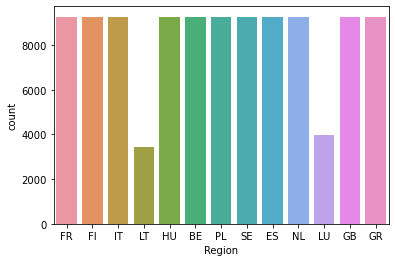

In [122]:
sns.countplot(df_final_dropna.Region)

/Users/cetiners/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

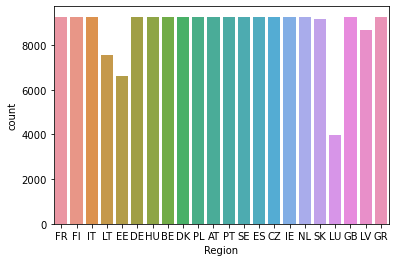

In [125]:
sns.countplot(df_final_agg.Region)

In [126]:
df_final_dropna.to_csv("vdd_final_data_dropna.csv")